In [ ]:
import pandas as pd

### `Q-1:` You are given a Multi index DataFrame. You task is to swap level-0 index with level-0 column.
* Change Branch -> ('cse', 'ece') as columns at level-0 and ('delhi'	'mumbai') as level-0 Index
* And Sort on row index level-0

In [ ]:
# Given Code Snippets
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
df = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

df

In [10]:
df.unstack(level=0).stack(level=0).swaplevel().swaplevel(axis=1).sort_index()

cse         ece      cse      ece
            avg_package avg_package students students
delhi  2019           1           9        2       10
       2020           3          11        4       12
       2021           5          13        6       14
       2022           7          15        8       16
mumbai 2019           0           0        0        0
       2020           0           0        0        0
       2021           0           0        0        0
       2022           0           0        0        0

### `Q-2:` Covid Cases Data Set Problem
 Make a DataFrame Using both Covid Dataset. With Country name as Level-0 and Provinance/State as Level-1 Index and date, No of cases and No of Deaths as Columns.

In [29]:
confirm = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTmqT3kxd0i0RUFiEnwA1Hboiunv28MeNTatZsIEqlPPB7mHrl0ttJL7utZ23_1s5FW8ZjODmB8jHIi/pub?gid=2142019845&single=true&output=csv')
deaths = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQn4nLCKIVZMw4e89YeRqgKaSAAwRFaZ6ILMW_FUejZ2tkv3Np1f9gD4QOl3ASHeLzWjOjfmLDKcCOF/pub?gid=212966958&single=true&output=csv")

In [30]:
deaths = deaths.melt(id_vars=['Province/State','Country/Region','Lat','Long'], var_name='date', value_name='num_of_deaths')
confirm = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'], var_name='date', value_name='num_of_cases')

In [31]:
final_df = confirm.merge(deaths,on=['Province/State','Country/Region','Lat','Long','date'])
final_df

,Province/State,Country/Region,Lat,Long,date,num_of_cases,num_of_deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0
...,...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661,4024


In [32]:
#final_df.set_index(['Province/State','Country/Region'], inplace=True)
final_df = final_df[['date','num_of_cases','num_of_deaths']]
final_df

,date,num_of_cases,num_of_deaths
0,1/22/20,0,0
1,1/22/20,0,0
2,1/22/20,0,0
3,1/22/20,0,0
4,1/22/20,0,0
...,...,...,...
311248,1/2/23,703228,5708
311249,1/2/23,535,0
311250,1/2/23,11945,2159
311251,1/2/23,334661,4024


### `Q-3:` Show Country with Heighest death percent out of confirmed Cases.

In [35]:
final_df.index.get_level_values(0).unique()

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            311243, 311244, 311245, 311246, 311247, 311248, 311249, 311250,
            311251, 311252],
           dtype='int64', length=311253)

In [34]:
temp_df = final_df.groupby('Country/Region')
temp_df['death_percentage'] = temp_df['num_of_cases']/temp_df['num_of_deaths']
temp_df.sort_values('death_percentage')

KeyError: 'Country/Region'

### `Q-4` : Make a dataframe for India from Covid Data with one extra column representing no of new cases.

* Just for Assumption "No of new cases" will be equal to difference of "no of cases" with previous day.
* First day new cases will be NaN or equal to no of cases

Say on 12/30/22 No of cases is - 44679608	and a day previous (12/29/22) no of cases is - 44679382.

Then for 12/30/22 -> No of New Cases  = 44679608 - 44679382 =

Note:- Try using shift Function

Try using the shift function

```
s = pd.Series([1,2,3,4,5,6])
s #-> [1,2,3,4,5,6]
s.shift(1) #-> [NaN, 1,2,3,4,5]
s.shift(-1) #-> [2,3,4,5,6, NaN]
```

In [26]:
final_df[final_df.index.get_level_values('Country') == 'India']

KeyError: 'Requested level (Country) does not match index name (None)'

In [21]:
india_df = final_df.loc['India'].copy()
india_df['new_cases'] = india_df['num_cases'] - india_df['num_cases'].shift(1)
india_df

KeyError: 'India'

### `Q-5:` Read the Dataset using the below given link and create a multi-index dataframe using the columns "Country" and "City/Town".

This dataset is about the most polluted cities in the world. You can get details from [here](https://www.kaggle.com/datasets/rajkumarpandey02/worlds-most-air-polluted-countries-cities).

**Dataset link:** https://tinyurl.com/2fe6vz4u Directly use this link to read.

**Task:**
1. Find out the name of the city of India which is most poluted based on PM10.
2. Find out the name of the city of India which has minumum pollution level based on PM10.
3. Do same operations (like 1 and 2) with the country China.
4. Make a pie chart based on the column "PM10" of the country Poland.
5. Make a bar chart based on the columns "PM2.5" and "PM10" of the countries Israel and Qatar.
6. Convert this MultiIndex DataFrame to Series by retaining the informations.

In [22]:
df = pd.read_csv('https://tinyurl.com/2fe6vz4u')
df.drop(columns=['Unnamed: 0'],inplace=True)

In [23]:
df

,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,1,India,Kanpur,2016,173,>75%,319,NaN,2018
1,2,India,Faridabad,2016,172,>75%,316,NaN,2018
2,3,India,Gaya,2016,149,50% -< 75%,275,NaN,2018
3,4,India,Varanasi,2016,146,>75%,260,NaN,2018
4,5,India,Patna,2016,144,>75%,266,NaN,2018
...,...,...,...,...,...,...,...,...,...
495,496,Poland,Lublin,2016,27,>75%,31,>75%,2018
496,497,Poland,Siedlce,2016,27,>75%,29,>75%,2018
497,498,Poland,Trzebinia,2016,27,>75%,35,>75%,2018
498,499,El Salvador,San Salvador,2016,27,50% -< 75%,59,NaN,2018


In [24]:
new_df = df.set_index(['Country', 'City/Town'])

In [25]:
new_df[new_df.index.get_level_values('Country') == 'India']

Position  Year  PM2.5 Temporal coverage  PM10  \
Country City/Town                                                           
India   Kanpur                     1  2016    173              >75%   319   
        Faridabad                  2  2016    172              >75%   316   
        Gaya                       3  2016    149        50% -< 75%   275   
        Varanasi                   4  2016    146              >75%   260   
        Patna                      5  2016    144              >75%   266   
        Delhi                      6  2016    143              >75%   292   
        Lucknow                    7  2016    138              >75%   255   
        Agra                       9  2016    131              >75%   194   
        Gurgaon                   10  2016    120        50% -< 75%   124   
        Muzaffarpur               11  2016    120              >75%   221   
        Jaipur                    14  2016    105        50% -< 75%   193   
        Patiala                   16  2016    101               NaN   184   
        Jodhpur                   17  2016     98              >75%   180   
        Nagpur                    33  2016     84               NaN    86   
        Kolkata                   55  2016     74              >75%   136   
        Ahmedabad                 87  2015     65        50% -< 75%   120   
        Mumbai                    94  2016     64              >75%   104   
        Chandrapur               111  2016     60              >75%   109   
        Panchkula                153  2016     55              >75%   101   
        Pune                     189  2016     50              >75%    89   
        Chennai                  202  2016     49              >75%    80   
        Bangalore                239  2016     46              >75%    96   
        Hyderabad                264  2016     44              >75%    84   
        Navi Mumbai              290  2016     41               NaN    67   
        Udaipur                  291  2016     41               NaN    98   
        Guwahati                 295  2016     40               NaN    81   
        Solapur                  306  2016     39              >75%    71   
        Jabalpur                 316  2016     38               NaN    79   
        Thiruvananthapuram       346  2016     35               NaN    48   
        Vizag                    353  2016     34               NaN    76   
        Tezpur                   366  2016     33               NaN    52   
        Aizawl                   484  2016     27               NaN    44   

                           Temporal coverage.1  Database version (year)  
Country City/Town                                                        
India   Kanpur                             NaN                     2018  
        Faridabad                          NaN                     2018  
        Gaya                               NaN                     2018  
        Varanasi                           NaN                     2018  
        Patna                              NaN                     2018  
        Delhi                              NaN                     2018  
        Lucknow                            NaN                     2018  
        Agra                               NaN                     2018  
        Gurgaon                            NaN                     2018  
        Muzaffarpur                        NaN                     2018  
        Jaipur                             NaN                     2018  
        Patiala                            NaN                     2018  
        Jodhpur                            NaN                     2018  
        Nagpur                             NaN                     2018  
        Kolkata                            NaN                     2018  
        Ahmedabad                          NaN                     2018  
        Mumbai                             NaN                     2018  
   

In [37]:
new_df.loc['India'].sort_values('PM10',ascending=False).head(1).index[0]

'Kanpur'

In [38]:
new_df.loc['India'].sort_values('PM10',ascending=False).tail(1).index[0]

'Aizawl'

In [39]:
new_df.loc['China'].sort_values('PM10',ascending=False).tail(1).index[0]

'Anshun'

In [40]:
new_df.loc['China'].sort_values('PM10',ascending=False).head(1).index[0]

'Jinan'

<AxesSubplot: ylabel='PM10'>

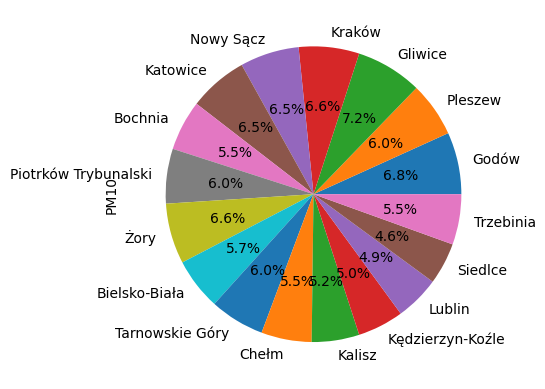

In [41]:
new_df.loc['Poland']['PM10'].plot(kind='pie',autopct="%0.1f%%")

<AxesSubplot: xlabel='Country,City/Town'>

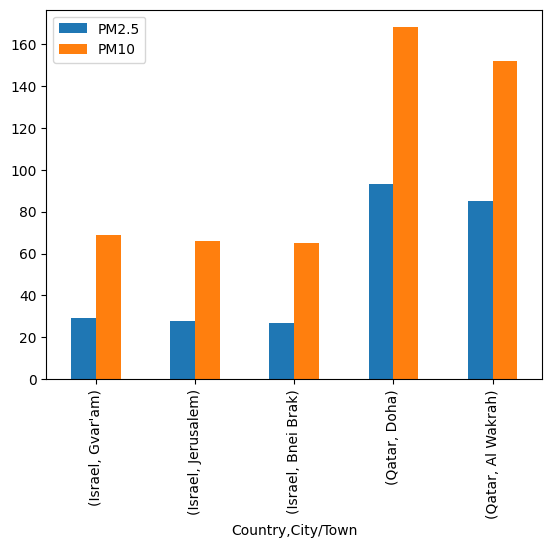

In [42]:
new_df.loc[['Israel','Qatar']][['PM2.5','PM10']].plot(kind='bar')